In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
df=pd.read_csv("/content/diabetes_linear_regression_200_medium_noise.csv")
x_train=df["BMI"]
y_train=df["Diabetes_Progression_Score"]

In [99]:
def cost_fun(x,y,w,b):
  m=x.shape[0]
  j_wb=0
  for i in range(0,m):
    v=(w*x[i]+b-y[i])**2
    j_wb+=v
  j_wb/=2*m
  return j_wb


In [100]:
def compute_gra(x,y,w,b):
  m=x.shape[0]
  g_w=0
  g_b=0
  for i in range(m):
    f_wb=w*x[i]+b
    g_w+=(f_wb-y[i])*x[i]
    g_b+=(f_wb-y[i])
  return (g_w/m),(g_b/m)


In [101]:
def gradient_fun(x,y,w,b,alpha,compute_gra,cost_fun,ite):
  for i in range(ite):
    g_fw,g_fb=compute_gra(x,y,w,b)
    w-=alpha*g_fw
    b-=alpha*g_fb

  return w,b


In [102]:
w,b=gradient_fun(x_train,y_train,0,0,0.001,compute_gra,cost_fun,5000)
print(w,b)

3.0862434723189973 1.6248611727361735


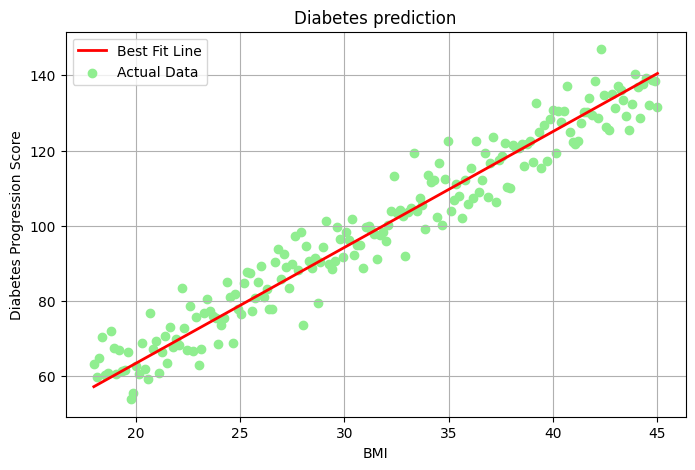

In [103]:
y_pred=w*x+b

x_line = np.linspace(x_train.min(), x_train.max(), 300)
y_line = w * x_line + b

plt.figure(figsize=(8,5))
plt.plot(x_line, y_line, color='red', linewidth=2, label='Best Fit Line')
plt.scatter(x_train, y_train, color='lightgreen', label='Actual Data')


plt.xlabel("BMI")
plt.ylabel("Diabetes Progression Score")
plt.title("Diabetes prediction")
plt.legend()
plt.grid(True)

plt.show()

In [104]:
bmi_test = 29
prediction = w * bmi_test + b

print(f"Predicted Diabetes Progression Score for BMI {bmi_test} -> {prediction:.2f}")


Predicted Diabetes Progression Score for BMI 29 -> 91.13
